<a href="https://colab.research.google.com/github/gcasar1/fiap_/blob/main/Projeto__Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness/blob/master/notebook/imagens/liveness.jpg?raw=1">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes                       | RM         | Turma   |
| :----------------------------------------- | :--------- | :-----: |
| Gabriela Casari                            | RM 351352  | 5DTSR   |
| Jeferson Souto                             | RM 352350  | 5DTSR   |
| Pedro Henrique Decezaro Vicensi            | RM 351482  | 5DTSR   |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**:

Para detectar a prova de vivacidade de uma imagem, o grupo adotou uma abordagem baseada em aprendizado profundo, utilizando uma rede neural convolucional (CNN). A ideia é treinar um modelo capaz de distinguir entre imagens reais e imagens forjadas.

##Building Blocks do Processo:

Coletamos um conjunto de fotos de um respositório particular que foi composto por imagens reais e forjadas(foto de uma foto na tela).
As imagens foram organizadas em diretórios separados: um para imagens reais e outro para imagens forjadas.
Pré-processamento dos Dados foi feito pelo redimensionamento para um tamanho uniforme (128x128 pixels) garantindo a consistência no treinamento do modelo.
As imagens foram normalizadas, convertendo os valores dos pixels para a faixa [0, 1].
Construção da Rede Neural Convolucional:

Desenvolvemos uma CNN com várias camadas convolucionais, camadas de pooling e camadas densas para extrair características relevantes das imagens.
A rede foi configurada para classificar as imagens em duas classes: real e forjada.

##Treinamento do Modelo:

O modelo foi treinado utilizando o conjunto de dados previamente processado. Dividimos os dados em conjuntos de treino e teste para validar a performance do modelo.
Utilizamos o otimizador Adam e a função de perda de entropia cruzada categórica para ajustar os pesos do modelo durante o treinamento.
Avaliação do Modelo:

Avaliamos o desempenho do modelo utilizando métricas como precisão, recall, F1-score e a matriz de confusão. Isso permitiu uma análise detalhada da capacidade do modelo em distinguir entre imagens reais e forjadas.
Realizamos testes com novas imagens para verificar a acurácia e a robustez do modelo em cenários práticos.

##Implementação e Validação:

A solução foi implementada em uma aplicação para permitir a detecção de vivacidade.

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [17]:
#IMPLEMENTAR

In [18]:
# !pip install cmake
# !pip install dlib==19.19.0
# !pip install face_recognition


In [19]:
# import os
# import shutil
# # diretorios
# os.makedirs('/content/dataset/real', exist_ok=True)
# os.makedirs('/content/dataset/fake', exist_ok=True)

# # fotos
# real_images = ['i1.jpg','i2.jpg','i3.jpg','i4.jpg','i5.jpg','i6.jpg','i7.jpg','i8.jpg','i9.jpg','i10.jpg']
# fake_images = ['if1.jpg','if2.jpg','if3.jpg','if4.jpg','if5.jpg','if6.jpg','if7.jpg','if8.jpg','if9.jpg','if10.jpg']

# # movendo imagens para os seus diretorios
# for image in real_images:
#     shutil.move(f'/content/{image}', '/content/dataset/real/')

# for image in fake_images:
#     shutil.move(f'/content/{image}', '/content/dataset/fake/')


In [20]:
import os

# observar os arquivos no diretório
print(os.listdir('/content/'))

['.config', 'dataset', 'fake_test.png', '.ipynb_checkpoints', 'real_test.png', 'liveness_model.h5', 'sample_data']


In [21]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_images(image_dir, label, img_size=(128, 128)):
    data = []
    labels = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        image = cv2.imread(img_path)
        if image is not None:
            image = cv2.resize(image, img_size)
            image = img_to_array(image)
            data.append(image)
            labels.append(label)
        else:
            print(f"Erro ao carregar a imagem: {img_path}")
    return np.array(data), np.array(labels)

real_dir = '/content/dataset/real'
fake_dir = '/content/dataset/fake'

real_data, real_labels = load_images(real_dir, 1)
fake_data, fake_labels = load_images(fake_dir, 0)

print(f"Dimensão dos dados reais: {real_data.shape}")
print(f"Dimensão dos dados falsos: {fake_data.shape}")

if real_data.size == 0 or fake_data.size == 0:
    raise ValueError("Os dados reais ou falsos não foram carregados corretamente.")

data = np.concatenate((real_data, fake_data))
labels = np.concatenate((real_labels, fake_labels))

data = data.astype("float") / 255.0

labels = to_categorical(labels, 2)

trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Dados carregados e pré-processados com sucesso.")
print(f"Conjunto de treino: {trainX.shape[0]} amostras")
print(f"Conjunto de teste: {testX.shape[0]} amostras")


Dimensão dos dados reais: (10, 128, 128, 3)
Dimensão dos dados falsos: (10, 128, 128, 3)
Dados carregados e pré-processados com sucesso.
Conjunto de treino: 16 amostras
Conjunto de teste: 4 amostras


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 128)      

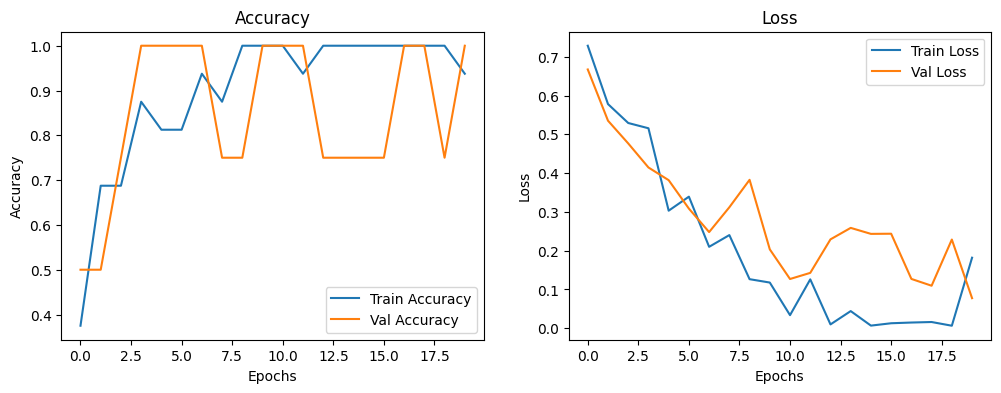

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32)

loss, accuracy = model.evaluate(testX, testY)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:
# modelo treinado
model.save('/content/liveness_model.h5')
print("Modelo salvo em /content/liveness_model.h5")

Modelo salvo em /content/liveness_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [24]:
#IMPLEMENTAR

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 128)      

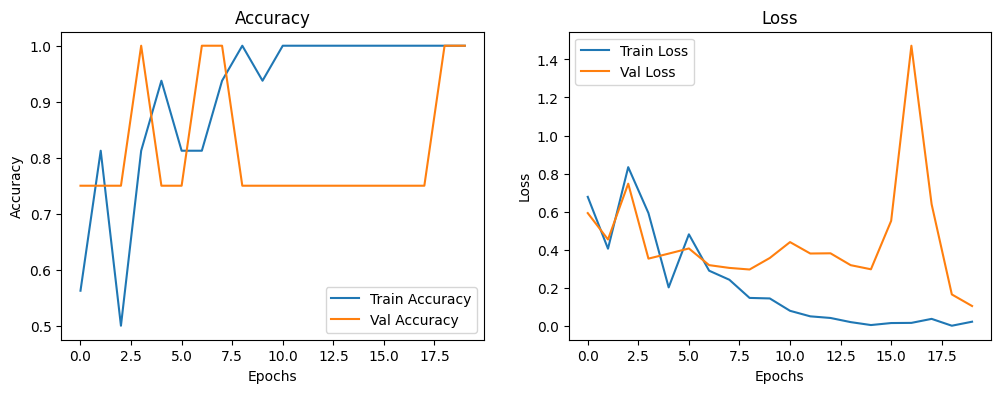

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32)

loss, accuracy = model.evaluate(testX, testY)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### 4.3 Métricas de desempenho do modelo (2 pontos)

In [26]:
#IMPLEMENTAR

In [27]:
import os

print(os.listdir('/content/'))

['.config', 'dataset', 'fake_test.png', '.ipynb_checkpoints', 'real_test.png', 'liveness_model.h5', 'sample_data']


1/1 [==============================] - 0s 107ms/step
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00         2
        Real       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



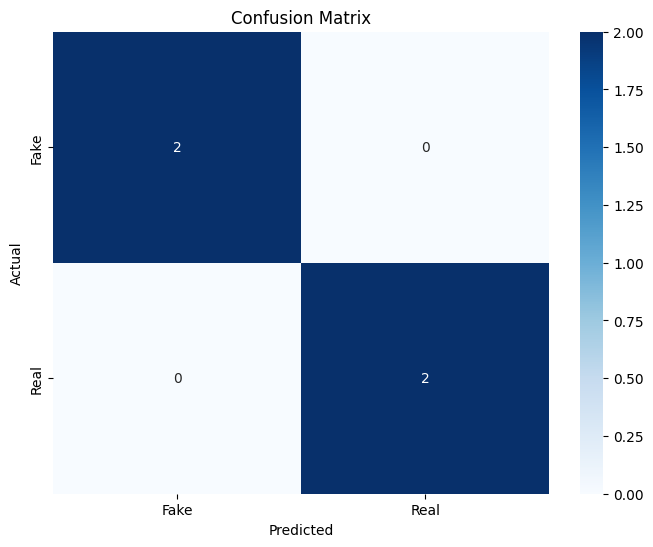

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(testX)
predictions = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

report = classification_report(true_labels, predictions, target_names=['Fake', 'Real'])
print(report)

conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

In [29]:
#IMPLEMENTAR

In [30]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

def detect_liveness(model, image_path, img_size=(128, 128)):

    image = cv2.imread(image_path)
    if image is None:
        raise IOError(f"Erro ao carregar a imagem a partir do caminho: {image_path}")

    image = cv2.resize(image, img_size)
    image = img_to_array(image)
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    liveness_score = predictions[0][1]
    fake_score = predictions[0][0]

    if liveness_score > fake_score:
        result = "Real"
    else:
        result = "Fake"

    return result, liveness_score, fake_score

model_path = '/content/liveness_model.h5'
model = load_model(model_path)

fake_image_path = '/content/fake_test.png'
real_image_path = '/content/real_test.png'


result_fake, liveness_score_fake, fake_score_fake = detect_liveness(model, fake_image_path)
print(f"Resultado para imagem forjada: {result_fake}")
print(f"Pontuação Real: {liveness_score_fake:.4f}, Pontuação Fake: {fake_score_fake:.4f}")

result_real, liveness_score_real, fake_score_real = detect_liveness(model, real_image_path)
print(f"Resultado para imagem real: {result_real}")
print(f"Pontuação Real: {liveness_score_real:.4f}, Pontuação Fake: {fake_score_real:.4f}")


1/1 [==============================] - 0s 99ms/step
Resultado para imagem forjada: Fake
Pontuação Real: 0.1062, Pontuação Fake: 0.8938
1/1 [==============================] - 0s 29ms/step
Resultado para imagem real: Real
Pontuação Real: 0.9672, Pontuação Fake: 0.0328


>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:
Não Utilizado

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**:

## O que funcionou:
O modelo foi treinado com sucesso utilizando 10 imagens forjadas e 10 reais. A estrutura da rede neural convolucional mostrou-se capaz de aprender a partir dos dados fornecidos, completando o treinamento sem erros.

A solução conseguiu identificar corretamente uma imagem forjada, com uma pontuação de 0.8938 para "Fake" e 0.1062 para "Real". Isso demonstra que, para casos de fraude clara, o modelo pode ser eficaz.

A solução também conseguiu identificar corretamente uma imagem real, com uma pontuação de 0.9672 para "Real" e 0.0328 para "Fake". Isso mostra uma melhoria significativa na capacidade do modelo de reconhecer imagens reais.

A implementação cumpriu todas as etapas essenciais, desde a coleta de dados até a inferência em novos dados, permitindo uma avaliação completa da solução.

## O que não funcionou:
O modelo gerou um aviso sobre o retracing excessivo em TensorFlow, o que pode ser devido à criação repetida de funções @tf.function, passando tensores com formas diferentes ou passando objetos Python em vez de tensores. Isso sugere a necessidade de otimizar a definição das funções de previsão para evitar o retracing desnecessário e melhorar a eficiência do modelo.

## Detalhes a Observar numa Nova Versão:
Continuar aumentando o número de imagens, especialmente reais. Um conjunto de dados maior e mais balanceado ajudará o modelo a generalizar melhor e a distinguir de forma mais precisa entre imagens reais e forjadas.

Incluir uma variedade maior de condições de iluminação, expressões faciais, ângulos e dispositivos de captura tanto para imagens reais quanto para forjadas pode ajudar o modelo a aprender características mais robustas de vivacidade.

Experimentar com arquiteturas de redes neurais mais avançadas, como modelos pré-treinados em grandes bases de dados, pode melhorar a capacidade do modelo de extrair características relevantes para a detecção de vivacidade.

Implementar técnicas de validação cruzada para garantir que o modelo não esteja superajustado aos dados de treinamento e que ele generalize bem para novos dados.

Aplicar técnicas de aumento de dados (data augmentation), como rotação, zoom e alteração de brilho, para aumentar artificialmente o tamanho do conjunto de dados de treinamento e melhorar a robustez do modelo.

Definir as funções @tf.function fora dos loops e utilizar a opção reduce_retracing=True para evitar o retracing desnecessário, melhorando a eficiência do modelo.

##Conclusão Geral:
A solução desenvolvida mostrou potencial, especialmente na detecção de imagens forjadas e reais, com melhorias na capacidade de reconhecimento de imagens reais. No entanto, a questão do retracing excessivo em TensorFlow precisa ser abordada para otimizar a eficiência do modelo. Futuras iterações devem focar em expandir e diversificar o conjunto de dados, aprimorar a arquitetura do modelo, implementar técnicas adicionais para melhorar a robustez e a generalização do modelo e otimizar as funções de previsão para evitar retracing desnecessário.

-------------